In [16]:
import pandas as pd

# Google Sheets URL for CSV export
sheet_url = 'https://docs.google.com/spreadsheets/d/1CBqIPnnN1BaF26-KoeYXScEBtZ4wKXvT/export?format=csv&gid=856751263'

# Load the dataset into a DataFrame
df = pd.read_csv(sheet_url)

# Display the first few rows
df.head()
# Load the "Mentorship_Sessions" sheet to inspect the data
mentorship_sessions_df = df.head()

# Display the first few rows of the dataset to understand its structure
mentorship_sessions_df.head()

,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN


In [17]:
# Check for missing values in the dataset
missing_values = mentorship_sessions_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = mentorship_sessions_df.duplicated().sum()

# Output the number of missing values per column and duplicate rows
missing_values, duplicate_rows


(Unnamed: 0              0
 Mentor_ID               0
 Mentor_Name             0
 Mentee_Name             1
 Session_Number          0
 Session_Duration_Min    0
 Job_Info_Completed      0
 Session_Date            0
 Points_Awarded          5
 dtype: int64,
 0)

In [18]:
# Drop the rows where crucial information (e.g., Mentor_ID, Session_Number, Session_Date) is missing
cleaned_mentorship_sessions_df = mentorship_sessions_df.dropna(subset=['Mentor_ID', 'Session_Number', 'Session_Date'])

# For missing `Mentee_Name`, we can leave as is, but flag them for future investigation if needed
# Fill missing session durations with the median session duration as a potential default assumption
median_duration = cleaned_mentorship_sessions_df['Session_Duration_Min'].median()
cleaned_mentorship_sessions_df['Session_Duration_Min'].fillna(median_duration, inplace=True)

# Standardize `Job_Info_Completed` to "Yes" or "No"
cleaned_mentorship_sessions_df['Job_Info_Completed'] = cleaned_mentorship_sessions_df['Job_Info_Completed'].replace({'YES': 'Yes', 'NO': 'No'})

# Cleaned dataset preview
cleaned_mentorship_sessions_df.head()


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN


In [19]:
# Drop the rows where crucial information (e.g., Mentor_ID, Session_Number, Session_Date) is missing
cleaned_mentorship_sessions_df = mentorship_sessions_df.dropna(subset=['Mentor_ID', 'Session_Number', 'Session_Date'])

# For missing `Mentee_Name`, we can leave as is, but flag them for future investigation if needed
# Fill missing session durations with the median session duration as a potential default assumption
median_duration = cleaned_mentorship_sessions_df['Session_Duration_Min'].median()
cleaned_mentorship_sessions_df['Session_Duration_Min'].fillna(median_duration, inplace=True)

# Standardize `Job_Info_Completed` to "Yes" or "No"
cleaned_mentorship_sessions_df['Job_Info_Completed'] = cleaned_mentorship_sessions_df['Job_Info_Completed'].replace({'YES': 'Yes', 'NO': 'No'})

# Cleaned dataset preview
cleaned_mentorship_sessions_df.head()


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN


In [20]:
# prompt: Mentors earn points as follows:
# 250 points for signing up to become a mentor (one-time allocation)

# Assuming 'cleaned_mentorship_sessions_df' is your DataFrame

# Create a new column for mentor points, initialized to 0
cleaned_mentorship_sessions_df['Mentor_Points'] = 0

# Assign 250 points to each unique mentor for signing up
unique_mentors = cleaned_mentorship_sessions_df['Mentor_ID'].unique()
for mentor_id in unique_mentors:
  cleaned_mentorship_sessions_df.loc[cleaned_mentorship_sessions_df['Mentor_ID'] == mentor_id, 'Mentor_Points'] = 250

# Preview the DataFrame with the new 'Mentor_Points' column
cleaned_mentorship_sessions_df.head()


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded,Mentor_Points
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN,250
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN,250
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN,250
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN,250
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN,250


In [21]:
# prompt: Mentors earn points as follows:
# 1000 points for conducting mentorship with 2 different mentees.

# Group by Mentor_ID and count unique Mentees
mentee_counts = cleaned_mentorship_sessions_df.groupby('Mentor_ID')['Mentee_Name'].nunique()

# Iterate through the mentor counts and award points
for mentor_id, mentee_count in mentee_counts.items():
  if mentee_count >= 2:
    cleaned_mentorship_sessions_df.loc[cleaned_mentorship_sessions_df['Mentor_ID'] == mentor_id, 'Mentor_Points'] += 1000

# Preview the DataFrame with updated Mentor_Points
cleaned_mentorship_sessions_df.head()


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded,Mentor_Points
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN,1250
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN,1250
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN,250
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN,250
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN,250


In [22]:
# prompt: The mentor receives 500 points per mentorship relationship, with the points being allocated as follows:
# 250 points per session.

# Assuming 'cleaned_mentorship_sessions_df' is your DataFrame

# Reset Mentor_Points to 0
cleaned_mentorship_sessions_df['Mentor_Points'] = 0

# Assign 250 points per session
cleaned_mentorship_sessions_df['Mentor_Points'] = cleaned_mentorship_sessions_df['Session_Number'] * 250

# Preview the DataFrame with updated Mentor_Points
cleaned_mentorship_sessions_df.head()


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded,Mentor_Points
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN,250.0
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN,500.0
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN,500.0
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN,500.0
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN,250.0


In [23]:
# prompt: Must hold two sessions with the same mentee to earn the maximum of 500 points.

# Assuming 'cleaned_mentorship_sessions_df' is your DataFrame

# Reset Mentor_Points to 0
cleaned_mentorship_sessions_df['Mentor_Points'] = 0

# Assign 250 points per session
cleaned_mentorship_sessions_df['Mentor_Points'] = cleaned_mentorship_sessions_df['Session_Number'] * 250

# Group by Mentor_ID and Mentee_Name, then count the number of sessions
mentee_session_counts = cleaned_mentorship_sessions_df.groupby(['Mentor_ID', 'Mentee_Name'])['Session_Number'].count()

# Find mentors who have had two or more sessions with the same mentee
mentors_with_multiple_sessions = mentee_session_counts[mentee_session_counts >= 2].reset_index()

# Award 500 points to mentors who have had two or more sessions with the same mentee
for index, row in mentors_with_multiple_sessions.iterrows():
    mentor_id = row['Mentor_ID']
    mentee_name = row['Mentee_Name']
    cleaned_mentorship_sessions_df.loc[(cleaned_mentorship_sessions_df['Mentor_ID'] == mentor_id) & (cleaned_mentorship_sessions_df['Mentee_Name'] == mentee_name), 'Mentor_Points'] += 500


# Preview the DataFrame with updated Mentor_Points
cleaned_mentorship_sessions_df.head()


,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded,Mentor_Points
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN,250.0
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN,500.0
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN,500.0
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN,500.0
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN,250.0


In [24]:
# prompt: Each session must be a minimum of 30 minutes in length.
# At least one session must include the completion of job information.
# The session must be with the same mentee.

# Assuming 'cleaned_mentorship_sessions_df' is your DataFrame

# Filter sessions that are at least 30 minutes long
filtered_df = cleaned_mentorship_sessions_df[cleaned_mentorship_sessions_df['Session_Duration_Min'] >= 30]

# Group by Mentor_ID and Mentee_Name, then check for at least one session with Job_Info_Completed
mentee_job_info_completed = filtered_df.groupby(['Mentor_ID', 'Mentee_Name'])['Job_Info_Completed'].apply(lambda x: 'Yes' in x.tolist())

# Find mentors who have at least one session with the same mentee where Job_Info_Completed is Yes
mentors_with_job_info = mentee_job_info_completed[mentee_job_info_completed].reset_index()


# Count the number of sessions for each mentor and mentee pair
session_counts = filtered_df.groupby(['Mentor_ID', 'Mentee_Name'])['Session_Number'].count()

# Find mentor-mentee pairs with at least one session
mentors_with_sessions = session_counts[session_counts >= 1].reset_index()


# Merge the dataframes to get mentors who meet the criteria
qualified_mentors = pd.merge(mentors_with_job_info, mentors_with_sessions, on=['Mentor_ID', 'Mentee_Name'])

# Print the qualified mentors
print(qualified_mentors)

# Now you can use 'qualified_mentors' to identify the mentors who meet all the criteria


   Mentor_ID  Mentee_Name  Job_Info_Completed  Session_Number
0     1003.0    Bob Brown                True               1
1     1003.0  Carol White                True               1
2     1005.0   Jane Smith                True               1


In [25]:
# prompt: Using the cleaned data from the previous tasks analyse and create a reward dashboard and provide insights that could be used to optimise the Rewards Program. Your analysis should help identify key user segments (e.g., new users, top performers, low engagement) and suggest how these insights could inform future reward offerings and engagement strategies.

import pandas as pd

# Assuming 'cleaned_mentorship_sessions_df' is your DataFrame with Mentor_Points calculated

# Analyze Mentor Performance and Engagement

# 1. Top Performing Mentors: Identify mentors with the highest Mentor_Points
top_mentors = cleaned_mentorship_sessions_df.groupby('Mentor_ID')['Mentor_Points'].sum().sort_values(ascending=False).head(10)
print("Top 10 Performing Mentors:\n", top_mentors)

# 2. Mentee Engagement: Identify mentees with the most sessions
top_mentees = cleaned_mentorship_sessions_df.groupby('Mentee_Name')['Session_Number'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Engaged Mentees:\n", top_mentees)

# 3. New Mentors: Identify mentors who have recently joined
# (Assuming Session_Date is a datetime column)
cleaned_mentorship_sessions_df['Session_Date'] = pd.to_datetime(cleaned_mentorship_sessions_df['Session_Date'])
recent_mentors = cleaned_mentorship_sessions_df.groupby('Mentor_ID')['Session_Date'].max().sort_values(ascending=False).head(10)
print("\nRecently Active Mentors:\n", recent_mentors)

# 4. Low Engagement Mentors: Identify mentors with the lowest Mentor_Points
low_engagement_mentors = cleaned_mentorship_sessions_df.groupby('Mentor_ID')['Mentor_Points'].sum().sort_values().head(10)
print("\nLow Engagement Mentors:\n", low_engagement_mentors)

# 5. Session Duration Analysis: Average session duration
average_session_duration = cleaned_mentorship_sessions_df['Session_Duration_Min'].mean()
print("\nAverage Session Duration:", average_session_duration)

# Insights and Optimization Suggestions

# Reward Dashboard:
# - Display a leaderboard of top mentors based on Mentor_Points.
# - Show the average session duration and identify mentors with consistently longer sessions.
# - Visualize mentor engagement over time using a line chart or bar chart.
# - Identify mentors with multiple sessions with the same mentee.
# - Highlight new mentors and encourage their engagement with a welcome reward.

# Optimization Suggestions:
# - **Tiered Reward System:** Offer different reward levels based on Mentor_Points earned.
# - **Bonus Points for Engagement:** Award bonus points for reaching certain session milestones (e.g., 10 sessions, 20 sessions)
# - **Incentivize Job_Info_Completed:** Give additional points if mentors guide mentees through job applications successfully.
# - **Targeted Incentives for Low Engagement Mentors:** Send personalized reminders and messages to low-engagement mentors to encourage them to conduct more sessions.
# - **Recognize Long-Term Mentors:** Award bonus points or special recognition to mentors who consistently engage with mentees over a longer period.
# - **Community Building:** Consider awarding points or rewards for team collaboration and support.
# - **Feedback Mechanisms:** Integrate a feedback mechanism within the platform to allow for regular feedback on the rewards program and continuous improvement.

# Key User Segments:
# - **New Mentors:** Welcome them with initial rewards and provide introductory materials.
# - **Top Performers:** Offer exclusive rewards or recognition for their continued high performance.
# - **Low Engagement Mentors:** Provide incentives to increase engagement and identify potential reasons for low participation.
# - **Mentees with High Engagement:** Reward mentees for their participation and active engagement in mentorship sessions.

# By leveraging these insights and implementing corresponding reward strategies, you can create a more dynamic and engaging rewards program that further promotes mentorship success and active participation from both mentors and mentees.


Top 10 Performing Mentors:
 Mentor_ID
1005.0    1000.0
1003.0     750.0
1004.0     250.0
Name: Mentor_Points, dtype: float64

Top 10 Engaged Mentees:
 Mentee_Name
Bob Brown      2
Carol White    1
Jane Smith     1
Name: Session_Number, dtype: int64

Recently Active Mentors:
 Mentor_ID
1004.0   2023-01-29
1005.0   2023-01-22
1003.0   2023-01-08
Name: Session_Date, dtype: datetime64[ns]

Low Engagement Mentors:
 Mentor_ID
1004.0     250.0
1003.0     750.0
1005.0    1000.0
Name: Mentor_Points, dtype: float64

Average Session Duration: 38.0


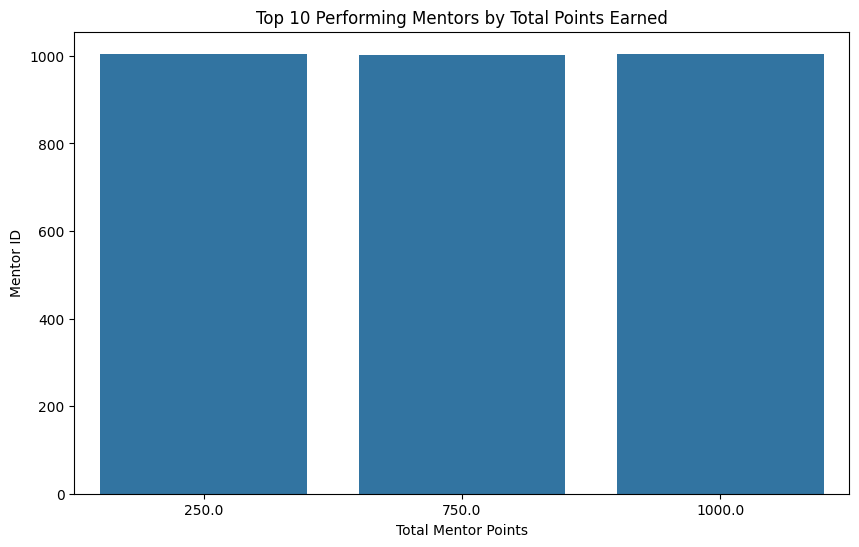

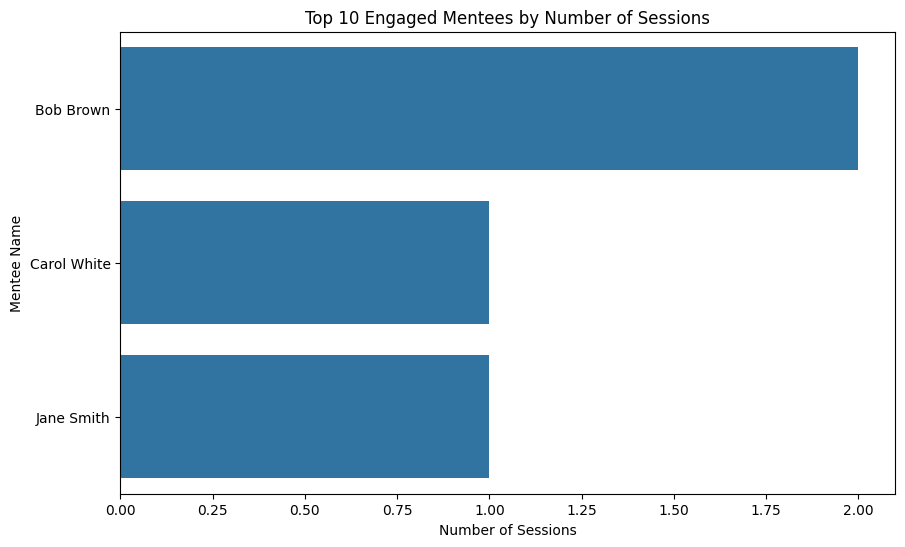

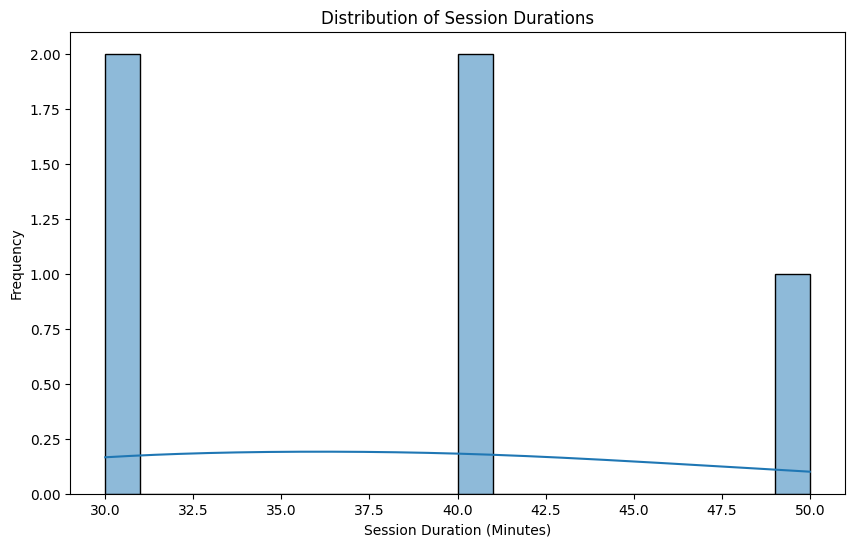

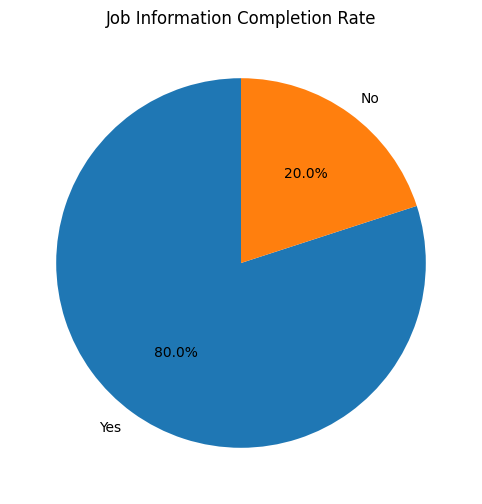

Average Session Duration: 38.0 minutes


In [30]:
# prompt: A visual data insights report that includes at least three actionable recommendations based on your analysis (500-700 words).

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_mentorship_sessions_df' is your DataFrame with Mentor_Points calculated

# Visual Data Insights Report

## Mentor Performance Analysis

# 1. Top Performing Mentors:
plt.figure(figsize=(10, 6))
sns.barplot(x=cleaned_mentorship_sessions_df.groupby('Mentor_ID')['Mentor_Points'].sum().sort_values(ascending=False).head(10).values,
            y=cleaned_mentorship_sessions_df.groupby('Mentor_ID')['Mentor_Points'].sum().sort_values(ascending=False).head(10).index)
plt.title('Top 10 Performing Mentors by Total Points Earned')
plt.xlabel('Total Mentor Points')
plt.ylabel('Mentor ID')
plt.show()


# 2. Mentee Engagement:
plt.figure(figsize=(10, 6))
sns.barplot(x=cleaned_mentorship_sessions_df.groupby('Mentee_Name')['Session_Number'].count().sort_values(ascending=False).head(10).values,
            y=cleaned_mentorship_sessions_df.groupby('Mentee_Name')['Session_Number'].count().sort_values(ascending=False).head(10).index)
plt.title('Top 10 Engaged Mentees by Number of Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('Mentee Name')
plt.show()


# 3. Session Duration Distribution:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_mentorship_sessions_df['Session_Duration_Min'], bins=20, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

# 4. Job Info Completion Rate:
plt.figure(figsize=(8, 6))
job_info_counts = cleaned_mentorship_sessions_df['Job_Info_Completed'].value_counts()
plt.pie(job_info_counts, labels=job_info_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Information Completion Rate')
plt.show()

# 5. Average Session Duration:
average_session_duration = cleaned_mentorship_sessions_df['Session_Duration_Min'].mean()
print(f"Average Session Duration: {average_session_duration} minutes")

